# Welcome
Hi! I'm **schneisse** from https://github.com/schneisse and this is AstroSpace project tutorial. I hope it will help you to understand what's going on here by the reference examples.
If you have any questions/ideas/critics, do not hesitate to write me an email: anyak2802@gmail.com 

Enjoy the code!

# Quick intro
<!-- # Why are we here?  -->


*coming soon*

# Imports

In [4]:
import numpy as np
from numpy import linalg
import pandas as pd
from importlib import reload
import sys
from pathlib import Path
import itertools as itt
import scipy as sp
from scipy import ndimage as ndi
from scipy import stats
import networkx as nx 
from tqdm.auto import tqdm

from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.lines import Line2D
import cmasher as cmr

from matplotlib.pyplot import figure, gcf, gca, plot, close, xlim, ylim, xlabel, ylabel, title,\
                              subplots
from cycler import cycler
# plt.style.use('seaborn-dark')

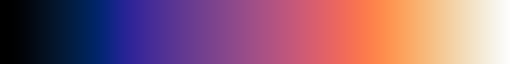

In [5]:
# set style
sequential_map = 'cmr.torch'
gradient_map = 'BuPu'
diverging_map = 'cmr.viola'
cyclic_map = 'twilight_shifted'

plt.rcParams['image.cmap'] = sequential_map
plt.get_cmap(sequential_map)

In [6]:
# import Space Colonization Scripts
import SCA
from SCA import Space_colonization
from point_cloud import PointCloud
import utils
from utils import Sholl, SWC_analyse

Can't load imreg package, affine and homography registrations won't work


/Users/anyak/image-funcut/imfun/external/tifffile.py:7261: UserWarning: No module named 'imfun.external._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/anyak/image-funcut/imfun/external/czifile.py:146: UserWarning: ImportError: No module named '_czifile'. Decoding of JXR and JPEG encoded images will not be available. Czifile.pyx can be obtained at http://www.lfd.uci.edu/~gohlke/
  warnings.warn(


# Let's have a closer look at the algorithm components

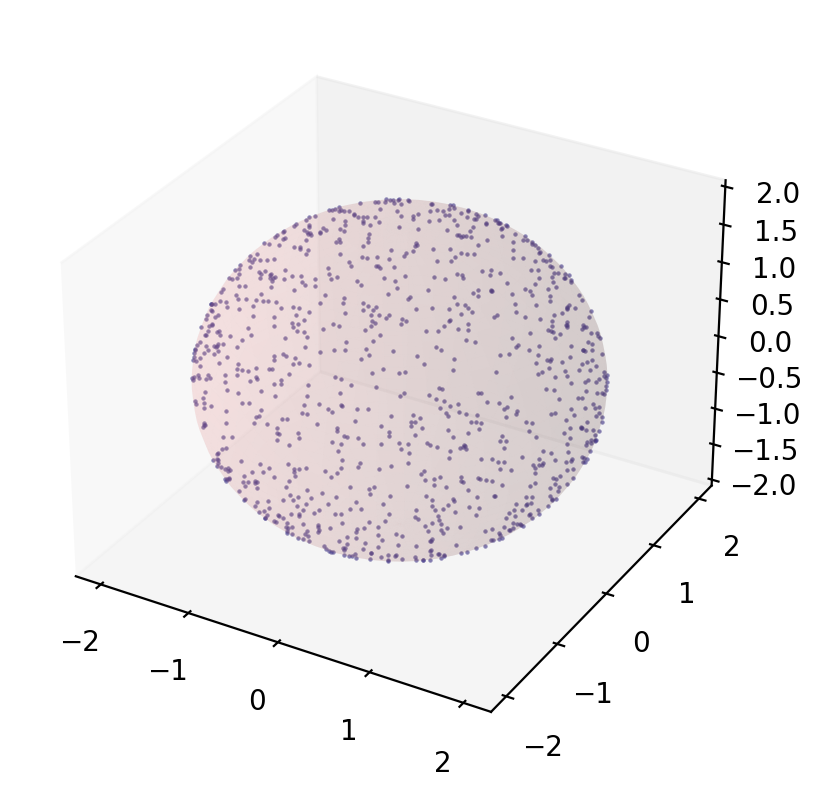

In [7]:
# create a point cloud distributed at the sphere surface
Cloud = PointCloud()
sources_1 = Cloud.Sphere()
sources_2 = Cloud.Cube()
sources_3 = Cloud.Sphere_surface()
sources = sources_3
R = Cloud.radius

fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.plot(sources[:, 0], sources[:, 1], sources[:, 2], 'o', color='darkslateblue', alpha=0.6, ms=0.6)

u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = R*np.cos(u)*np.sin(v)
y = R*np.sin(u)*np.sin(v)
z = R*np.cos(v)

ax.plot_surface(x, y, z, color="lightcoral", alpha=0.1)
ax.set_facecolor('white')
fig.set_facecolor('white')
ax.grid(False)

In [8]:
Cloud.__dict__

{'cloud': array([[ 1.70983859, -1.02675183,  0.1491063 ],
        [ 1.79868339,  0.07695579,  0.87110037],
        [-1.86980425,  0.67845086,  0.20865406],
        ...,
        [ 1.14840667, -1.32867646,  0.95696446],
        [-1.05098591,  1.64473835,  0.43619306],
        [-0.14672916, -0.02654025, -1.9944338 ]]),
 'radius': 2,
 'Npoints': 1000,
 'center': [0, 0, 0]}

In [9]:
# initialize a tree
# regular case of root (or soma center) placement -- cloud center
root = np.array(Cloud.center)
root

array([0, 0, 0])

In [10]:
init_SCA = Space_colonization(root=root, 
                              sources=sources, 
                              tree=set())
init_SCA.__dict__

{'tree': {<SCA.TreeNode at 0x7fd5657e3ee0>},
 'root': <SCA.TreeNode at 0x7fd5657e3ee0>,
 'sources': array([[ 1.70983859, -1.02675183,  0.1491063 ],
        [ 1.79868339,  0.07695579,  0.87110037],
        [-1.86980425,  0.67845086,  0.20865406],
        ...,
        [ 1.14840667, -1.32867646,  0.95696446],
        [-1.05098591,  1.64473835,  0.43619306],
        [-0.14672916, -0.02654025, -1.9944338 ]]),
 'iterations': 1000,
 'Di': 1,
 'Dg': 0.02,
 'Dk': 0.04,
 'w_lim': 400}

In [11]:
# anly root nodes always contains None in parent feature
for i in init_SCA.tree:
    print(i.parent)

None


In [12]:
# Di, Dg and Dk parameters sets automatically since
# SCA initiated. Use the following code to customize
# parameters:
init_SCA.set_parameters(
    iters=1500,
    Di=1,
    Dg=0.01,
    Dk=0.02,
    w_lim=10000
)
init_SCA.__dict__

{'tree': {<SCA.TreeNode at 0x7fd5657e3ee0>},
 'root': <SCA.TreeNode at 0x7fd5657e3ee0>,
 'sources': array([[ 1.70983859, -1.02675183,  0.1491063 ],
        [ 1.79868339,  0.07695579,  0.87110037],
        [-1.86980425,  0.67845086,  0.20865406],
        ...,
        [ 1.14840667, -1.32867646,  0.95696446],
        [-1.05098591,  1.64473835,  0.43619306],
        [-0.14672916, -0.02654025, -1.9944338 ]]),
 'iterations': 1500,
 'Di': 1,
 'Dg': 0.01,
 'Dk': 0.02,
 'w_lim': 10000,
 'upd_cycle': 100}

In [13]:
help(init_SCA.set_parameters)

Help on method set_parameters in module SCA:

set_parameters(iters, Di, Dg, Dk, w_lim=400, upd_cycle=100) method of SCA.Space_colonization instance
    Set growth parameters:
    
    iters: # iterations
    Di: Influence Distance
    Dg: Segment Distance
    Dk: Kill Distance



# Grow a tree!

In [14]:
# initiate tree computation
init_SCA.go_tree_classic()

  0%|          | 0/1500 [00:00<?, ?it/s]

In [15]:
# check new tree nodes
init_SCA.tree

{<SCA.TreeNode at 0x7fd565880040>,
 ...}

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:185: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = color_tree, alpha=0.7)


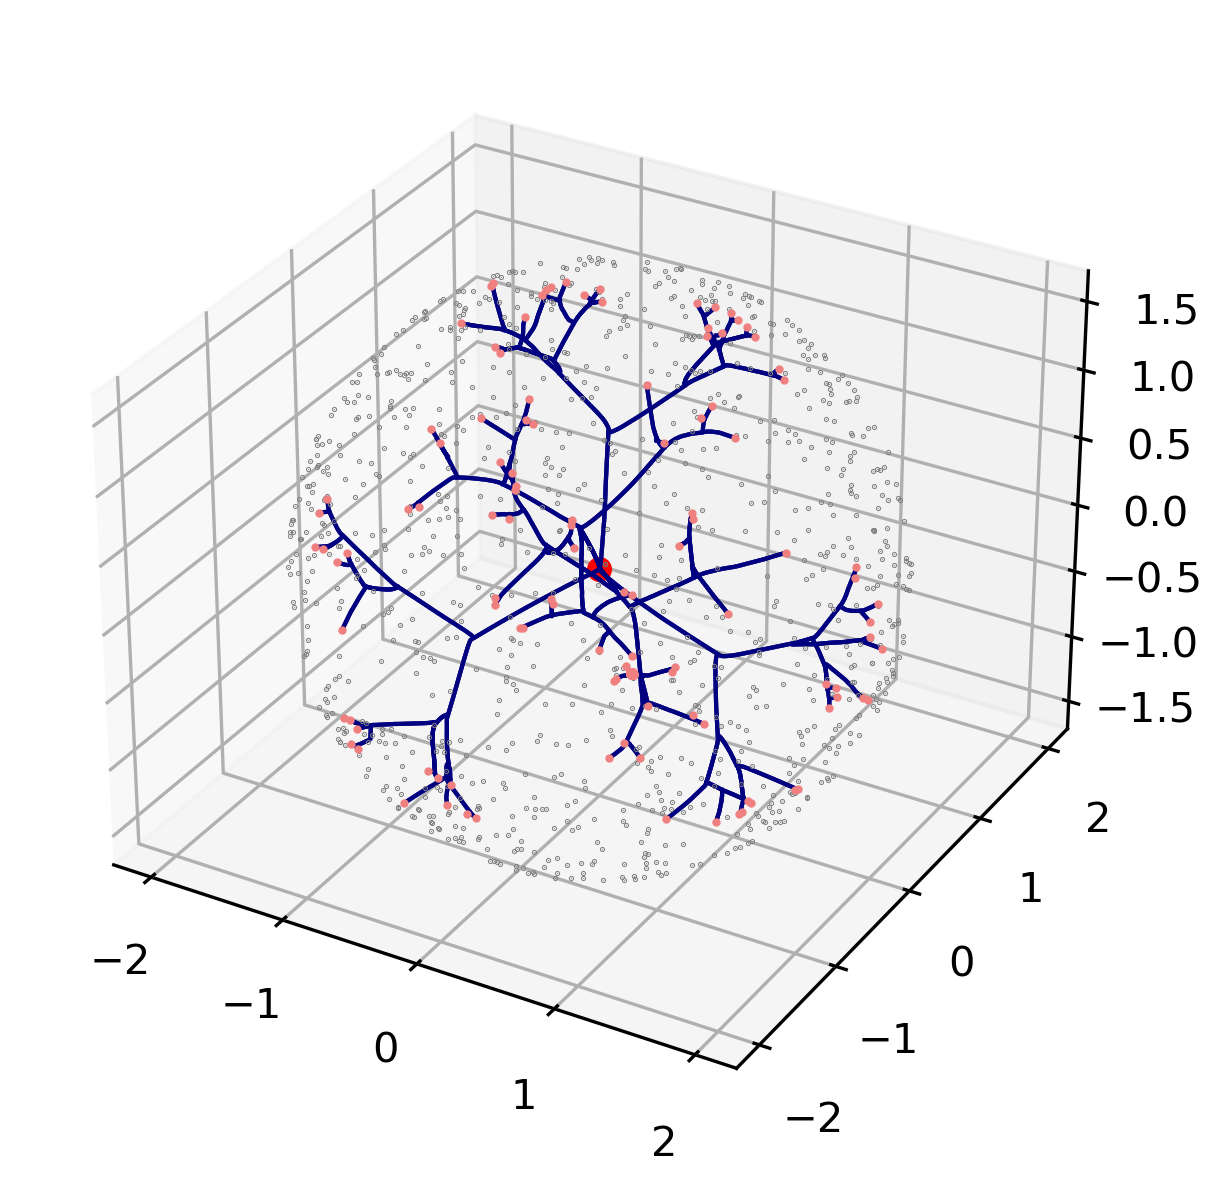

In [16]:
# execute this cell for embedded plotting func
SCA.plot_tree(
    tree=init_SCA.tree,
    root=init_SCA.root,
    sources=init_SCA.sources
)

# Feature extraction

## Save

In [22]:
# let's save morphology first
filename = 'test.swc'
save_path = '/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace' # add your personal save path in ''
save_path

'/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace'

In [18]:
# convert tree class object to graph
graph = init_SCA.make_graph()

# you can simulate a tree thickness by
# adding radii with set_thickness function
graph_with_rad = SCA.set_thickness(
    graph=graph,
    Dg=init_SCA.__dict__['Dg']
) 

################################################################
# WARNING! RADII ARE REQUIRED FOR EXECUTING swc_save FUNCTION!
################################################################

# create false radii to continue:
# nx.set_node_attributes(graph, 0.01, name='sigma_mask')

In [19]:
# extract netwprkx graph data
# graph_with_rad.nodes.data()

In [20]:
# now we are ready to save morphology in .swc format
# for additional information see http://www.neuronland.org/NLMorphologyConverter/MorphologyFormats/SWC/Spec.html

SCA.swc_save(
    graph=graph_with_rad,
    filename=save_path,
    center=root,
    Dg = init_SCA.__dict__['Dg'],
    sigmas_rad=True)

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:490: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  soma_rad = max(np.array(list(sigmas_vals))[:, 1]) * 0.5


## Morphological Features

In [21]:
help(utils.SWC_analyse)

Help on class SWC_analyse in module utils:

class SWC_analyse(builtins.object)
 |  SWC_analyse(input_path, save_path)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_path, save_path)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  morphofeatures(self, features=None, save=True, show_results=False, special_id=None)
 |  
 |  sholl(self, step=1, save=False)
 |  
 |  tmd(self, save=True)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [24]:
analysis = utils.SWC_analyse(input_path=filename, save_path=save_path)

In [36]:
analysis.morphofeatures(save=True)

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/utils.py:133: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  nodes = swc_data.to_dict('record')
2023-09-06 17:12:04,816 root         INFO     selected marks: <bound method FeatureExtractionRun.select_marks of <neuron_morphology.feature_extractor.feature_extraction_run.FeatureExtractionRun object at 0x7fd564da3580>>
2023-09-06 17:12:04,818 root         INFO     selected features: ['total_volume', 'total_surface_area', 'total_length', 'num_outer_bifurcations', 'max_branch_order', 'num_tips', 'num_branches', 'num_nodes']
2023-09-06 17:12:05,836 root         WARNING  writing additional outputs to csv. See output json for record of selected features and marks


In [37]:
analysis.sholl(step=0.1, save=True)

{'radius': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
 'cross': array([ 5,  5,  5,  5,  5,  5,  5,  5,  5, 10, 11, 12, 12, 18, 22, 32, 46,
        65, 27, 94])}

In [50]:
sholl_file = utils.get_files(save_path, '.txt')
feature_file = utils.get_files(save_path, '.csv')

In [54]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [79]:
def plot_sholl_from_file(file, plot = 'func'):
    rad_for_hist = []
    with open(file) as f:
        lines = f.readlines()
        lines = [l.split(' ') for l in lines[1:]]
        R = []
        rad = [float(l) for l in np.array(lines)[:, 0]]
        crox = [int(l[:-1]) for l in np.array(lines)[:, 1]]
        for m, r in enumerate(rad):
            R.append([r for x in range(crox[m])])
        radcro = flatten(R)
        rad_for_hist.append(radcro)
        name = [os.path.basename(file).split('.')[0] for i in range(len(radcro))]
    if plot == 'func':
        plt.plot(rad, crox, c='r')

    elif plot == 'hist':
        plt.hist(rad_for_hist)
        
    plt.xlabel('Distance from soma')
    plt.ylabel('# Intersections')


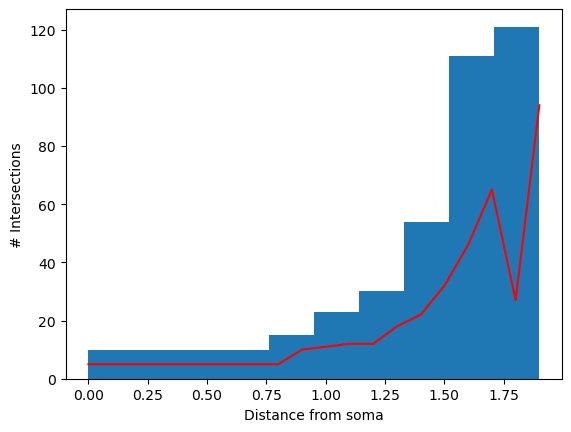

In [80]:
plot_sholl_from_file(sholl_file[0], plot='func')
plot_sholl_from_file(sholl_file[0], plot='hist')

In [83]:
pd.read_csv(feature_file[0])

,reconstruction_id,total_volume,total_surface_area,total_length,num_outer_bifurcations,max_branch_order,num_tips,num_branches,num_nodes
0,test,0.252425,12.039718,48.789991,186,20,376,751,4881


# Advanced Morphological Features

We can also perform the topological analysis with TMD algorithm by BlueBrain project team

See https://github.com/BlueBrain/TMD for more info

In [30]:
# We can also perform the topological analysis with TMD algorithm by BlueBrain project team
# see https://github.com/BlueBrain/TMD for more info

import tmd 
from tmd.view import view, plot
import morphio 
import neurom as nm
from neurom.view import matplotlib_impl, matplotlib_utils

In [31]:
cell = tmd.io.load_neuron(filename, remove_duplicates=True)
ph_astro = tmd.methods.get_ph_neuron(cell)

(array([[1.19481651e-17, 8.39495878e-18, 1.74734716e-17, ...,
         9.31817137e-04, 5.37033804e-04, 2.97004162e-04],
        [2.89181561e-17, 1.62938871e-17, 2.03874778e-17, ...,
         1.14080939e-03, 6.63316946e-04, 3.70137716e-04],
        [7.05331481e-17, 3.60704396e-17, 2.89971093e-17, ...,
         1.38497571e-03, 8.12304132e-04, 4.57273891e-04],
        ...,
        [4.83142657e-03, 4.90363846e-03, 4.81873624e-03, ...,
         7.47662831e-01, 8.20978701e-01, 8.63717616e-01],
        [4.66245845e-03, 4.72776011e-03, 4.63439553e-03, ...,
         6.87715509e-01, 7.62556460e-01, 8.10123514e-01],
        [4.49340074e-03, 4.56033378e-03, 4.46729195e-03, ...,
         6.25221173e-01, 7.00053288e-01, 7.51012057e-01]]),
 (<Figure size 640x480 with 1 Axes>,
  <AxesSubplot: title={'center': 'Persistence image'}, xlabel='End radial distance from soma', ylabel='Start radial distance from soma'>))

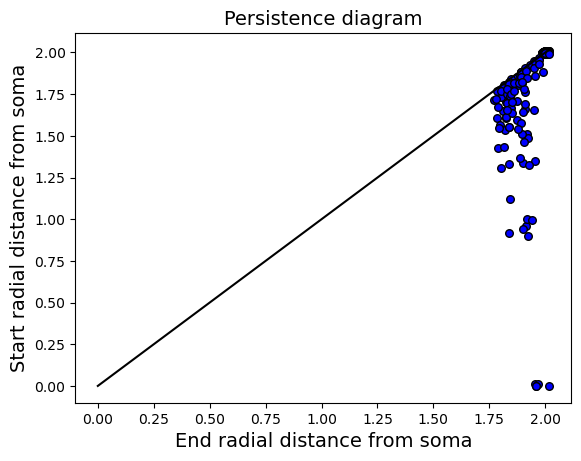

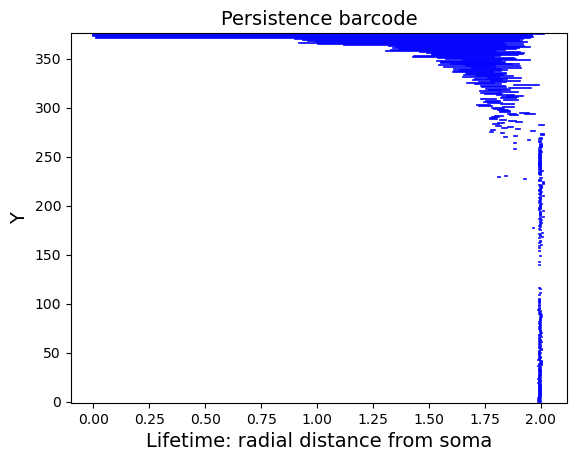

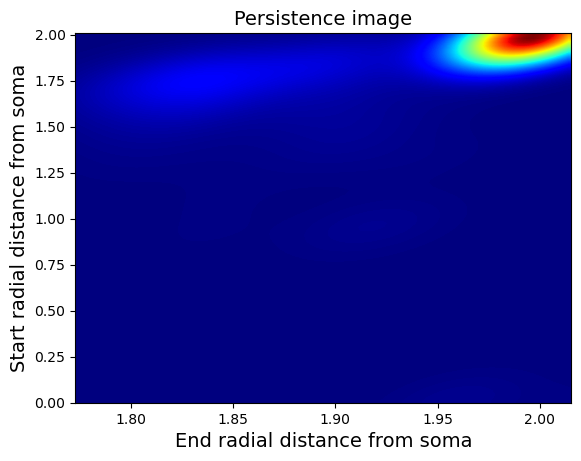

In [32]:
plot.diagram(ph_astro, subplot=True)
# plt.savefig('diagram.png', dpi=300)

plot.barcode(ph_astro, subplot=True)
# plt.savefig('barcode.png', dpi=300)

plot.persistence_image(ph_astro, subplot=True)
# plt.savefig('persistence_image.png', dpi=300)

It is also implemented in utils:

In [28]:
# analysis.tmd(save=False)